In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv('sample_train.csv')

In [3]:
df.shape

(200000, 8)

In [4]:
df.dtypes

ride_id                int64
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
df['dropoff_longitude'].isna().sum()

1

In [6]:
df.dropna()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [7]:
df.fare_amount.mean()

11.359955250000626

In [8]:
import pandas as pd
import numpy as np

# Assuming you already have a DataFrame 'df' with your dataset

# Function to calculate Haversine distance
def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in km
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    distance = R * c
    
    return distance

# Apply the Haversine function to calculate distances
df['haversine_distance'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Calculate the median Haversine distance
median_distance = df['haversine_distance'].median()

print("Median Haversine Distance:", median_distance, "km")

Median Haversine Distance: 2.1209923961833708 km


In [9]:
max_distance = df['haversine_distance'].max()

print("Maximum Haversine Distance:", max_distance, "km")

Maximum Haversine Distance: 16409.239135313168 km


In [10]:
df1 = df.copy()

In [11]:
zero_distance_rides = df[df['haversine_distance'] == 0.0]

num_zero_distance_rides = len(zero_distance_rides)

print("Number of rides with 0.0 Haversine distance:", num_zero_distance_rides)

Number of rides with 0.0 Haversine distance: 5632


In [12]:
# Filter the DataFrame for rides with 0.0 Haversine distance
zero_distance_rides = df[df['haversine_distance'] == 0.0]

# Calculate the mean 'fare_amount' for these rides
mean_fare_for_zero_distance_rides = zero_distance_rides['fare_amount'].mean()

print("Mean 'fare_amount' for rides with 0.0 Haversine distance:", mean_fare_for_zero_distance_rides)

Mean 'fare_amount' for rides with 0.0 Haversine distance: 11.585317826704578


<AxesSubplot:ylabel='Frequency'>

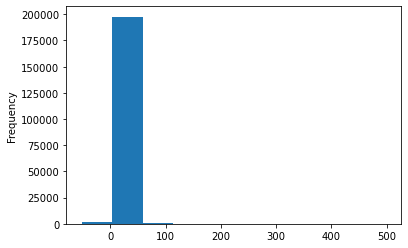

In [13]:
df.fare_amount.plot(kind = 'hist')

My Thought Process: 

Data Entry Errors: The anomaly could be a result of data entry errors, where the Haversine distance was recorded as 0 despite actual travel. This could happen due to issues with GPS data or data collection.

Short Trips: Some short trips, such as rides within a very small area, might have a Haversine distance close to 0. However, a fare of 11.59 (the mean) for such a short trip may still seem unusually high.

Pricing Model: The pricing model for these rides might be different from typical taxi or ride-sharing pricing models. There could be fixed fees or other factors that contribute to the fare amount.

Outliers: From the Histogram above he data points have outliers that deviate significantly from the typical fare distribution. There should be thororugh investigation

In [14]:
df['fare_amount'].max()

499.0

In [15]:
costliest_ride = df[df['fare_amount'] == df['fare_amount'].max()]

# Get the Haversine distance for the costliest ride
haversine_distance_costliest_ride = costliest_ride['haversine_distance'].values[0]

print("Haversine distance for the costliest ride:", haversine_distance_costliest_ride, "kilometers")

Haversine distance for the costliest ride: 0.0007899213191009994 kilometers


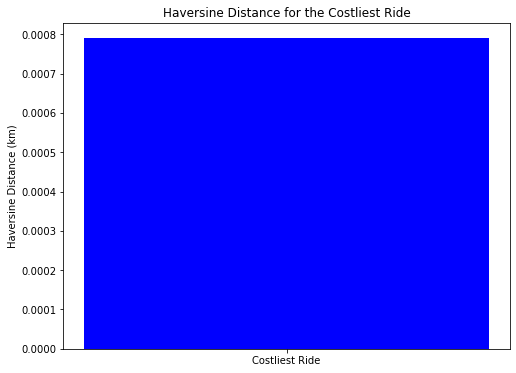

In [30]:
# Create a bar chart to visualize the Haversine distance
plt.figure(figsize=(8, 6))
plt.bar(['Costliest Ride'], [haversine_distance_costliest_ride], color='blue')
plt.title('Haversine Distance for the Costliest Ride')
plt.ylabel('Haversine Distance (km)')
plt.show()

My Thought Process:

Magnitude: A Haversine distance of 0.0007899 kilometers is equivalent to about 0.7899 meters (since 1 kilometer = 1000 meters). This means that the costliest ride traveled an extremely short distance, less than a meter 😲.

Such a small Haversine distance suggests that the costliest ride likely involved a very short trip, possibly within a small area or over a very short distance, such as a few steps or a fraction of a city block. This could indicate an anomaly or a data entry error, as it's unusual for a ride fare to be significantly high for such a short distance.

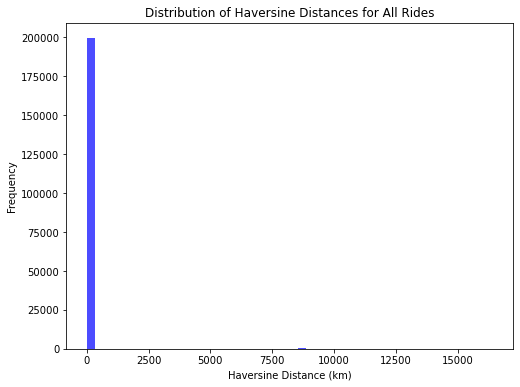

In [32]:
# Extract Haversine distances for all rides
haversine_distances = df['haversine_distance']

# Create a histogram to visualize the distribution of Haversine distances
plt.figure(figsize=(8, 6))
plt.hist(haversine_distances, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Haversine Distances for All Rides')
plt.xlabel('Haversine Distance (km)')
plt.ylabel('Frequency')
plt.show()


In [16]:
df.dtypes

ride_id                 int64
fare_amount           float64
pickup_datetime        object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count         int64
haversine_distance    float64
dtype: object

In [17]:
# Convert the 'pickup_datetime' column to datetime type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])


# Count the number of rides recorded in the year 2014
rides_2014 = df[df['pickup_datetime'].dt.year == 2014]
count_rides_2014 = len(rides_2014)

print("Number of rides recorded in the year 2014:", count_rides_2014)

Number of rides recorded in the year 2014: 29968


In [18]:
# Count the number of rides recorded in the first quarter of 2014
rides_first_quarter_2014 = df[(df['pickup_datetime'].dt.year == 2014) & (df['pickup_datetime'].dt.quarter == 1)]
count_rides_first_quarter_2014 = len(rides_first_quarter_2014)

print("Number of rides recorded in the first quarter of 2014:", count_rides_first_quarter_2014)

Number of rides recorded in the first quarter of 2014: 7687


In [19]:
# Filter the data for September 2010
rides_september_2010 = df[(df['pickup_datetime'].dt.year == 2010) & (df['pickup_datetime'].dt.month == 9)]

# Group by day of the week and count the number of rides
day_of_week_counts = rides_september_2010['pickup_datetime'].dt.day_name().value_counts()

# Find the day with the maximum rides
max_rides_day = day_of_week_counts.idxmax()

print("Day of the week with the maximum rides in September 2010:", max_rides_day)

Day of the week with the maximum rides in September 2010: Thursday


In [20]:
# Create 'ride_week_day' feature
df['ride_week_day'] = df['pickup_datetime'].dt.day_name()

In [22]:
df.ride_week_day

0          Thursday
1            Friday
2            Monday
3            Friday
4          Thursday
            ...    
199995       Sunday
199996       Friday
199997       Monday
199998    Wednesday
199999     Saturday
Name: ride_week_day, Length: 200000, dtype: object

In [24]:
df = pd.get_dummies(df, columns=['ride_week_day'], drop_first=True)

In [25]:
df.dtypes

ride_id                                  int64
fare_amount                            float64
pickup_datetime            datetime64[ns, UTC]
pickup_longitude                       float64
pickup_latitude                        float64
dropoff_longitude                      float64
dropoff_latitude                       float64
passenger_count                          int64
haversine_distance                     float64
ride_week_day_Monday                     uint8
ride_week_day_Saturday                   uint8
ride_week_day_Sunday                     uint8
ride_week_day_Thursday                   uint8
ride_week_day_Tuesday                    uint8
ride_week_day_Wednesday                  uint8
dtype: object

please note that we should not include "Decision Tree Classifier" and "KNN Classifier" in this comparison because they are classification algorithms, not regression algorithms. In this case, since we are predicting a numerical value (fare amount), we should focus on regression algorithms.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

df.dropna(inplace=True)

# Define features and target variable
X = df[['passenger_count', 'haversine_distance', 'ride_week_day_Monday', 'ride_week_day_Tuesday', 'ride_week_day_Wednesday', 'ride_week_day_Thursday',  'ride_week_day_Saturday', 'ride_week_day_Sunday']]
y = df['fare_amount']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train models
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred_linear_reg = linear_reg.predict(X_test)
y_pred_random_forest_reg = random_forest_reg.predict(X_test)

# Calculate R-squared values
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)
r2_random_forest_reg = r2_score(y_test, y_pred_random_forest_reg)

# Calculate adjusted R-squared values
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2_linear_reg = 1 - (1 - r2_linear_reg) * (n - 1) / (n - p - 1)
adj_r2_random_forest_reg = 1 - (1 - r2_random_forest_reg) * (n - 1) / (n - p - 1)

print("Adjusted R-squared for Linear Regression:", adj_r2_linear_reg)
print("Adjusted R-squared for Random Forest Regression:", adj_r2_random_forest_reg)


Adjusted R-squared for Linear Regression: 0.0006130998123345943
Adjusted R-squared for Random Forest Regression: 0.630823428583891


In [34]:
# We can also use statsmodel library
import statsmodels.api as sm

# Initialize and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred_linear_reg = linear_reg.predict(X_test)

# Calculate R-squared value using scikit-learn
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

# Get the number of observations (n) and number of predictors (p)
n = X_test.shape[0]
p = X_test.shape[1]

# Add a constant term to the feature matrix for intercept
X_test_with_intercept = sm.add_constant(X_test)

# Fit a linear regression model using statsmodels
model = sm.OLS(y_test, X_test_with_intercept).fit()

# Calculate the adjusted R-squared value
adj_r2_linear_reg = model.rsquared_adj

print("Adjusted R-squared for Linear Regression (scikit-learn):", adj_r2_linear_reg)
print("Adjusted R-squared for Linear Regression (statsmodels):", adj_r2_linear_reg)


Adjusted R-squared for Linear Regression (scikit-learn): 0.0008724463825739992
Adjusted R-squared for Linear Regression (statsmodels): 0.0008724463825739992
